In [1]:
import pandas as pd
from ucimlrepo import fetch_ucirepo

# Step 1: Fetch dataset from UCI
heart_disease = fetch_ucirepo(id=45)

# Step 2: Save as CSV 
df = pd.concat([heart_disease.data.features, heart_disease.data.targets], axis=1)
df.to_csv("heart_disease.csv", index=False)

# Step 3: Load CSV with pandas
df = pd.read_csv("heart_disease.csv")

# Explore dataset
print(df.head())            # First 5 rows
print(df.info())            # Structure and datatypes
print(df.isnull().sum())    # Check for missing values

# Clean missing values if any
df = df.dropna()   # or df.fillna(method="ffill")


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  num  
0  0.0   6.0    0  
1  3.0   3.0    2  
2  2.0   7.0    1  
3  0.0   3.0    0  
4  0.0   3.0    0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       

In [2]:
# Basic statistics
print(df.describe())

# Example: Group by "sex" and compute mean of "age"
grouped = df.groupby("sex")["age"].mean()
print(grouped)

# Example finding
print("On average, men in the dataset are older than women.")


              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    3.158249  131.693603  247.350168    0.144781   
std      9.049736    0.468500    0.964859   17.762806   51.997583    0.352474   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  243.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  276.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean     0.996633  149.599327    0.326599    1.055556    1.602694    0.676768   
std      0.994914   22.9415

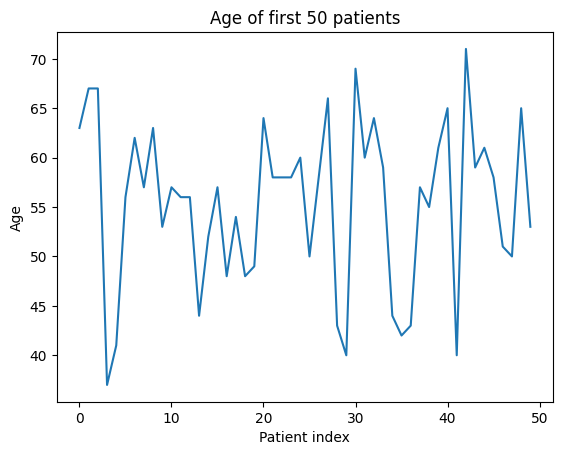

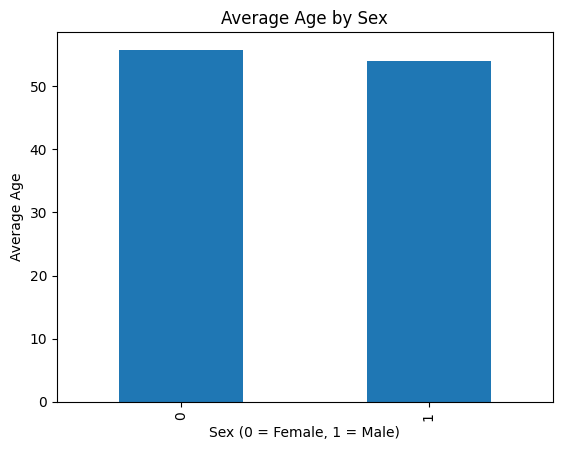

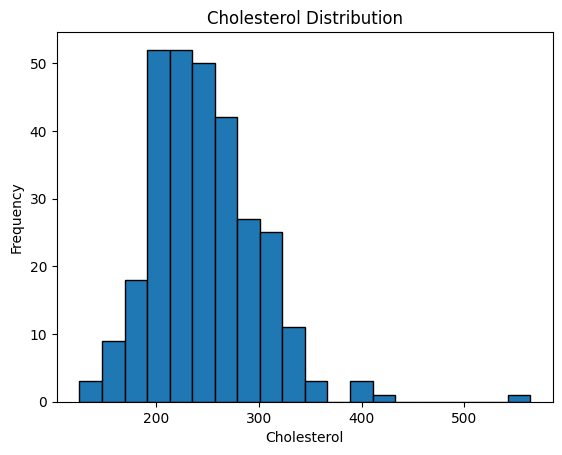

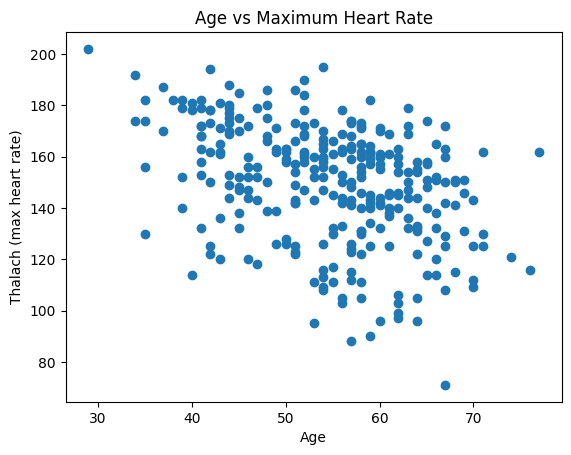

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Line chart (e.g., age values across first 50 patients)
plt.plot(df["age"].head(50))
plt.title("Age of first 50 patients")
plt.xlabel("Patient index")
plt.ylabel("Age")
plt.show()

# 2. Bar chart: average age by sex
df.groupby("sex")["age"].mean().plot(kind="bar")
plt.title("Average Age by Sex")
plt.xlabel("Sex (0 = Female, 1 = Male)")
plt.ylabel("Average Age")
plt.show()

# 3. Histogram: distribution of cholesterol
df["chol"].plot(kind="hist", bins=20, edgecolor="black")
plt.title("Cholesterol Distribution")
plt.xlabel("Cholesterol")
plt.show()

# 4. Scatter plot: age vs. maximum heart rate
plt.scatter(df["age"], df["thalach"])
plt.title("Age vs Maximum Heart Rate")
plt.xlabel("Age")
plt.ylabel("Thalach (max heart rate)")
plt.show()
